<a href="https://colab.research.google.com/github/s669799/DAT158-MLproject/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
!pip install gradio

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import seaborn as sns
import gradio as gr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# Part 1 - Data collection

This section reads and collects data in a DataFrame, as well as displaying the data to give an impression of content and format.

In [256]:
seed = 42
np.random.seed(seed)

df_train=pd.read_csv("https://raw.githubusercontent.com/s669799/DAT158-MLproject/refs/heads/main/assets/train.csv", index_col="id")
df_test=pd.read_csv("https://raw.githubusercontent.com/s669799/DAT158-MLproject/refs/heads/main/assets/test.csv")

df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [257]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [258]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [259]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


# Part 2 - Pre-processing data

This next part aims to examine columns of missing data and significance of said data.

In [260]:
# Sum of missing
missing_train_sum = df_train.isna().sum()
missing_test_sum = df_test.isna().sum()
# Percentage of missing data
missing_train_percent = df_train.isna().mean() * 100
missing_test_percent = df_test.isna().mean() * 100

# Print sum and percentage of missing data in train set
print("Columns in df_train with missing values:")
print(missing_train_sum[missing_train_sum > 0])

print("\nColumns in df_train with missing values:")
print(missing_train_percent[missing_train_percent > 0])

# Print sum and percentage of missing data in test set
print("\nColumns in df_test with missing values:")
print(missing_test_sum[missing_test_sum > 0])

print("\nColumns in df_test with missing values:")
print(missing_test_percent[missing_test_percent > 0])

Columns in df_train with missing values:
fuel_type       5083
accident        2452
clean_title    21419
dtype: int64

Columns in df_train with missing values:
fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64

Columns in df_test with missing values:
fuel_type       3383
accident        1632
clean_title    14239
dtype: int64

Columns in df_test with missing values:
fuel_type       2.691543
accident        1.298433
clean_title    11.328666
dtype: float64


We see here that fuel type, accident and clean title are columns that are missing large amounts of data.

In the clean title column we set the title to not clean if data is missing, under the assumption that the owner of a clean car would provide the proof. The accident column is set to "None reported" if data is missing.

Fuel type, however, is a bit more complex. First task is to collect the NaN fuel types, next filter out entries where the engine column contains keywords that indicates it is a combustion engine, like liter or v6.

In [261]:
# Filter rows where 'fuel_type' is NaN, and that are also actually electric
def set_electric_fuel_type(df):
    fuel_nan_df = df[df['fuel_type'].isnull()]
    non_electric_indicators = [
        'v6', 'v8', 'litre', 'liter', 'twin turbo', 'turbo',
        r'\d+[,.]\d+[lL]']
    pattern = '|'.join(non_electric_indicators)
    is_probably_non_electric = fuel_nan_df['engine'].str.contains(pattern, case=False, na=False)
    probably_electric_df = fuel_nan_df[~is_probably_non_electric]
    df.loc[probably_electric_df.index, 'fuel_type'] = 'Electricity'

    return df

df_train = set_electric_fuel_type(df_train)
df_test = set_electric_fuel_type(df_test)

# Handling missing values: Assume title not clean as seller does not have proof. 'No' if it's not filled.
df_train['clean_title'].fillna('No', inplace=True)
df_test['clean_title'].fillna('No', inplace=True)

df_train['accident'].fillna('None reported', inplace=True)
df_test['accident'].fillna('None reported', inplace=True)


In [262]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [263]:
import re
def extract_engine_features(df):
  # Extract horsepower
  df['horsepower'] = df['engine'].apply(lambda x: float(re.search(r'(\d+(\.\d+)?)HP', x).group(1)) if re.search(r'(\d+(\.\d+)?)HP', x) else None)

  # Extract displacement
  df['displacement'] = df['engine'].apply(lambda x: float(re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x).group(1) or re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x).group(2)) if re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x) else None)

  # Extract engine type
  df['engine_type'] = df['engine'].apply(lambda x: re.search(r'(V\d+|I\d+|Flat \d+|Straight \d+)', x).group(1) if re.search(r'(V\d+|I\d+|Flat \d+|Straight \d+)', x) else None)

  # Extract Cylinder Count
  df['cylinders'] = df['engine'].apply(
      lambda x:
      int(re.search(r'\b(\d+) Cylinder\b', x).group(1))
      if re.search(r'\b(\d+) Cylinder\b', x)
      else (int(re.search(r'\b(V\d+|I\d+|Flat \d+|Straight \d+)\b', x).group(0)[1:])
            if re.search(r'\b(V\d+|I\d+|Flat \d+|Straight \d+)\b', x)
            else None)
    )

  # Extract Fuel Type
  fuel_types = ['Gasoline', 'Diesel', 'Electric', 'Hybrid', 'Flex Fuel']
  df['fuel_type'] = df['engine'].apply(lambda x: next((fuel for fuel in fuel_types if fuel in x), None))

  return df

df_train = extract_engine_features(df_train)
df_test = extract_engine_features(df_test)
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,displacement,engine_type,cylinders
id,,,,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,None,4.0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,None,8.0
2,Chevrolet,Silverado 2500 LT,2002,136731,Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,None,8.0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,None,8.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,None,4.0


In [264]:
# Percentage of missing data
missing_train = df_train.isna().mean() * 100
missing_test = df_test.isna().mean() * 100

print("Columns in df_train with missing values:")
print(missing_train[missing_train > 0])

print("\nColumns in df_test with missing values:")
print(missing_test[missing_test > 0])

Columns in df_train with missing values:
fuel_type       16.732349
horsepower      17.640943
displacement     3.590883
engine_type     52.809323
cylinders        8.054823
dtype: float64

Columns in df_test with missing values:
fuel_type       16.719707
horsepower      17.647386
displacement     3.530909
engine_type     52.748031
cylinders        7.999841
dtype: float64


In [265]:
# We have extraced what we need from engine, model is hard to categorize and engine_type has too much missing data to use effectively, so we drop these columns.
columns_to_drop = ['model', 'engine_type', 'engine']
df_train.drop(columns=[col for col in columns_to_drop if col in df_train.columns], inplace=True)
df_test.drop(columns=[col for col in columns_to_drop if col in df_test.columns], inplace=True)

In [266]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Iterative Imputer: Limit max iterations and increase tolerance
imputer = IterativeImputer(max_iter=10, tol=1e-3, random_state=0)

df_train[['horsepower', 'displacement']] = imputer.fit_transform(df_train[['horsepower', 'displacement']])
df_test[['horsepower', 'displacement']] = imputer.transform(df_test[['horsepower', 'displacement']])

simple_imputer = SimpleImputer(strategy='mean')
df_train['cylinders'] = simple_imputer.fit_transform(df_train[['cylinders']])
df_test['cylinders'] = simple_imputer.transform(df_test[['cylinders']])

In [267]:
df_train.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,displacement,cylinders
id,,,,,,,,,,,,,
0,MINI,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0
1,Lincoln,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0
2,Chevrolet,2002,136731,Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0
3,Genesis,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0
4,Mercedes-Benz,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0


In [268]:
# Transmission types
transmission_counts = df_train['transmission'].value_counts()
print(transmission_counts)

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [269]:
def map_transmission(transmission):
    # Standardize the input
    transmission = transmission.strip().lower()

    if any(keyword in transmission for keyword in ['a/t', 'automatic']):
        return 'Automatic'
    elif any(keyword in transmission for keyword in ['m/t', 'manual']):
        return 'Manual'
    elif any(keyword in transmission for keyword in ['cvt', 'variator']):
        return 'Variator'
    elif any(keyword in transmission for keyword in ['dt', 'dual']):
        return 'Dual Clutch'
    else:
        return 'Other'

# Apply the function to the DataFrame
df_train['transmission'] = df_train['transmission'].apply(map_transmission)
df_test['transmission'] = df_test['transmission'].apply(map_transmission)

print(df_train['transmission'].value_counts())
print("\n")
print(df_test['transmission'].value_counts())

transmission
Automatic      150302
Dual Clutch     19255
Manual          16358
Variator         2005
Other             613
Name: count, dtype: int64


transmission
Automatic      100296
Dual Clutch     12824
Manual          10785
Variator         1349
Other             436
Name: count, dtype: int64


In [270]:
def mapping_columns(df):
    # Replace values in the 'accident' column
    df["accident"] = df["accident"].replace({
        'At least 1 accident or damage reported': 1,
        'None reported': 0
    })

    # Replace values in the 'clean_title' column
    df["clean_title"] = df["clean_title"].replace({
        "Yes": 1,
        "No": 0
    })

    # Replace values in the 'transmission' column
    df["transmission"] = df["transmission"].replace({'Automatic':1, 'Dual Clutch':2, 'Manual':3, 'Variator':4, 'Other':5})

    return df

df_train = mapping_columns(df_train)
df_test = mapping_columns(df_test)

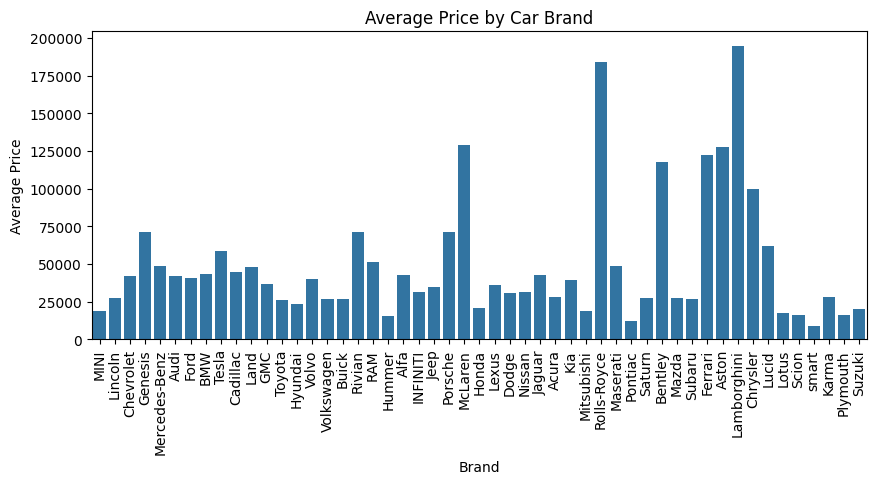

In [271]:
plt.figure(figsize=(10, 4))
sns.barplot(x='brand', y='price', data=df_train[:10000], errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [272]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Encoding categorical variables
categorical_columns = ['brand', 'fuel_type', 'ext_col', 'int_col']
lb = LabelEncoder()

for col in categorical_columns:
    if col in df_train.columns:
        df_train[col] = lb.fit_transform(df_train[col])
        df_test[col] = lb.transform(df_test[col])


In [273]:
# df_train.reset_index(drop=True, inplace=True)

In [274]:
df_train.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,displacement,cylinders
id,,,,,,,,,,,,,
0,31,2007,213000,3,1,312,71,0,1,4200,172.0,1.6,4.0
1,28,2002,143250,3,1,263,10,1,1,4999,252.0,3.9,8.0
2,9,2002,136731,2,1,38,71,0,1,13900,320.0,5.3,8.0
3,16,2017,19500,3,2,29,14,0,1,45000,420.0,5.0,8.0
4,36,2021,7388,3,1,29,10,0,1,97500,208.0,2.0,4.0


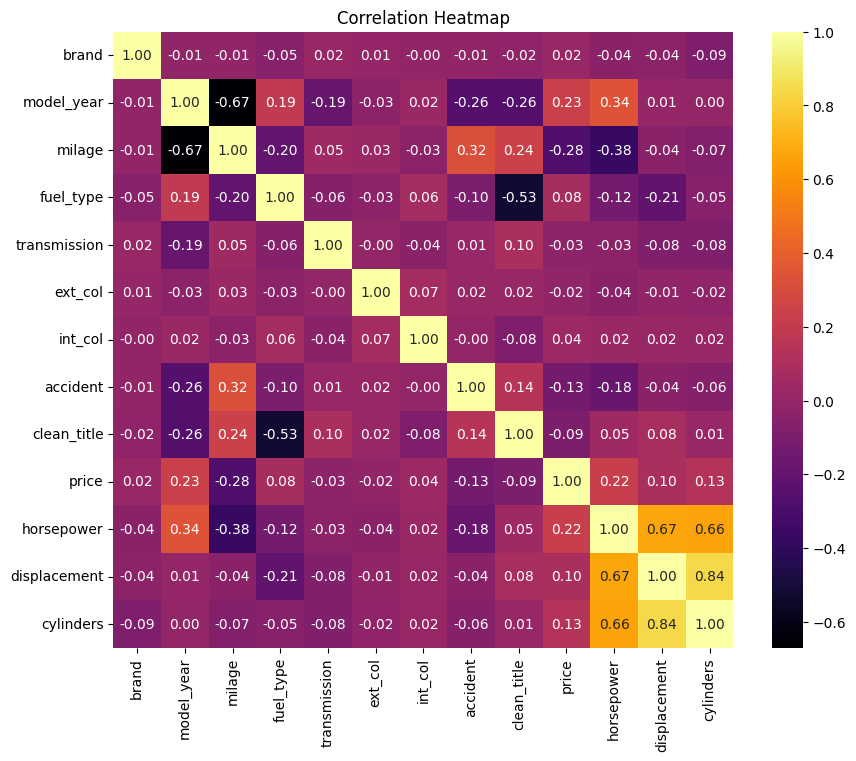

In [275]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='inferno', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

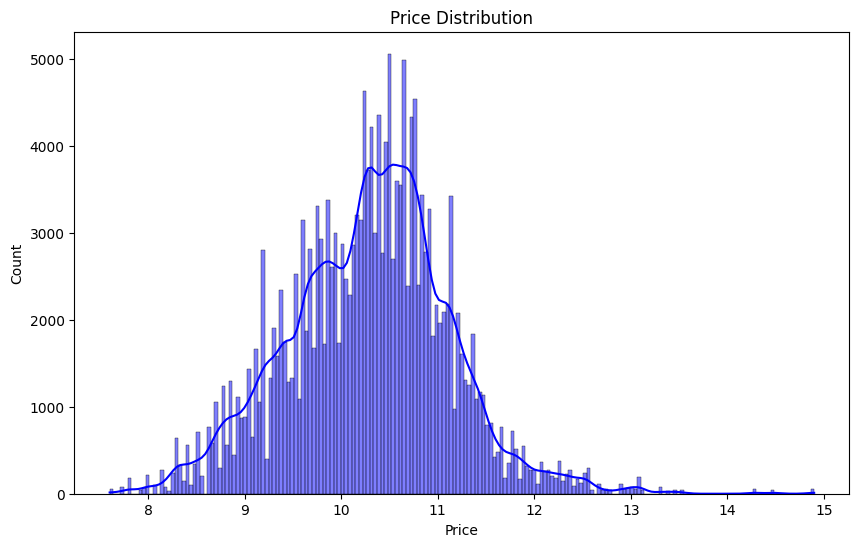

In [276]:
# Log (Natural logarithm) transform the highly skewed target variable (price)
df_train['price'] = np.log1p(df_train['price'])

plt.figure(figsize=(10, 6))
sns.histplot(df_train['price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

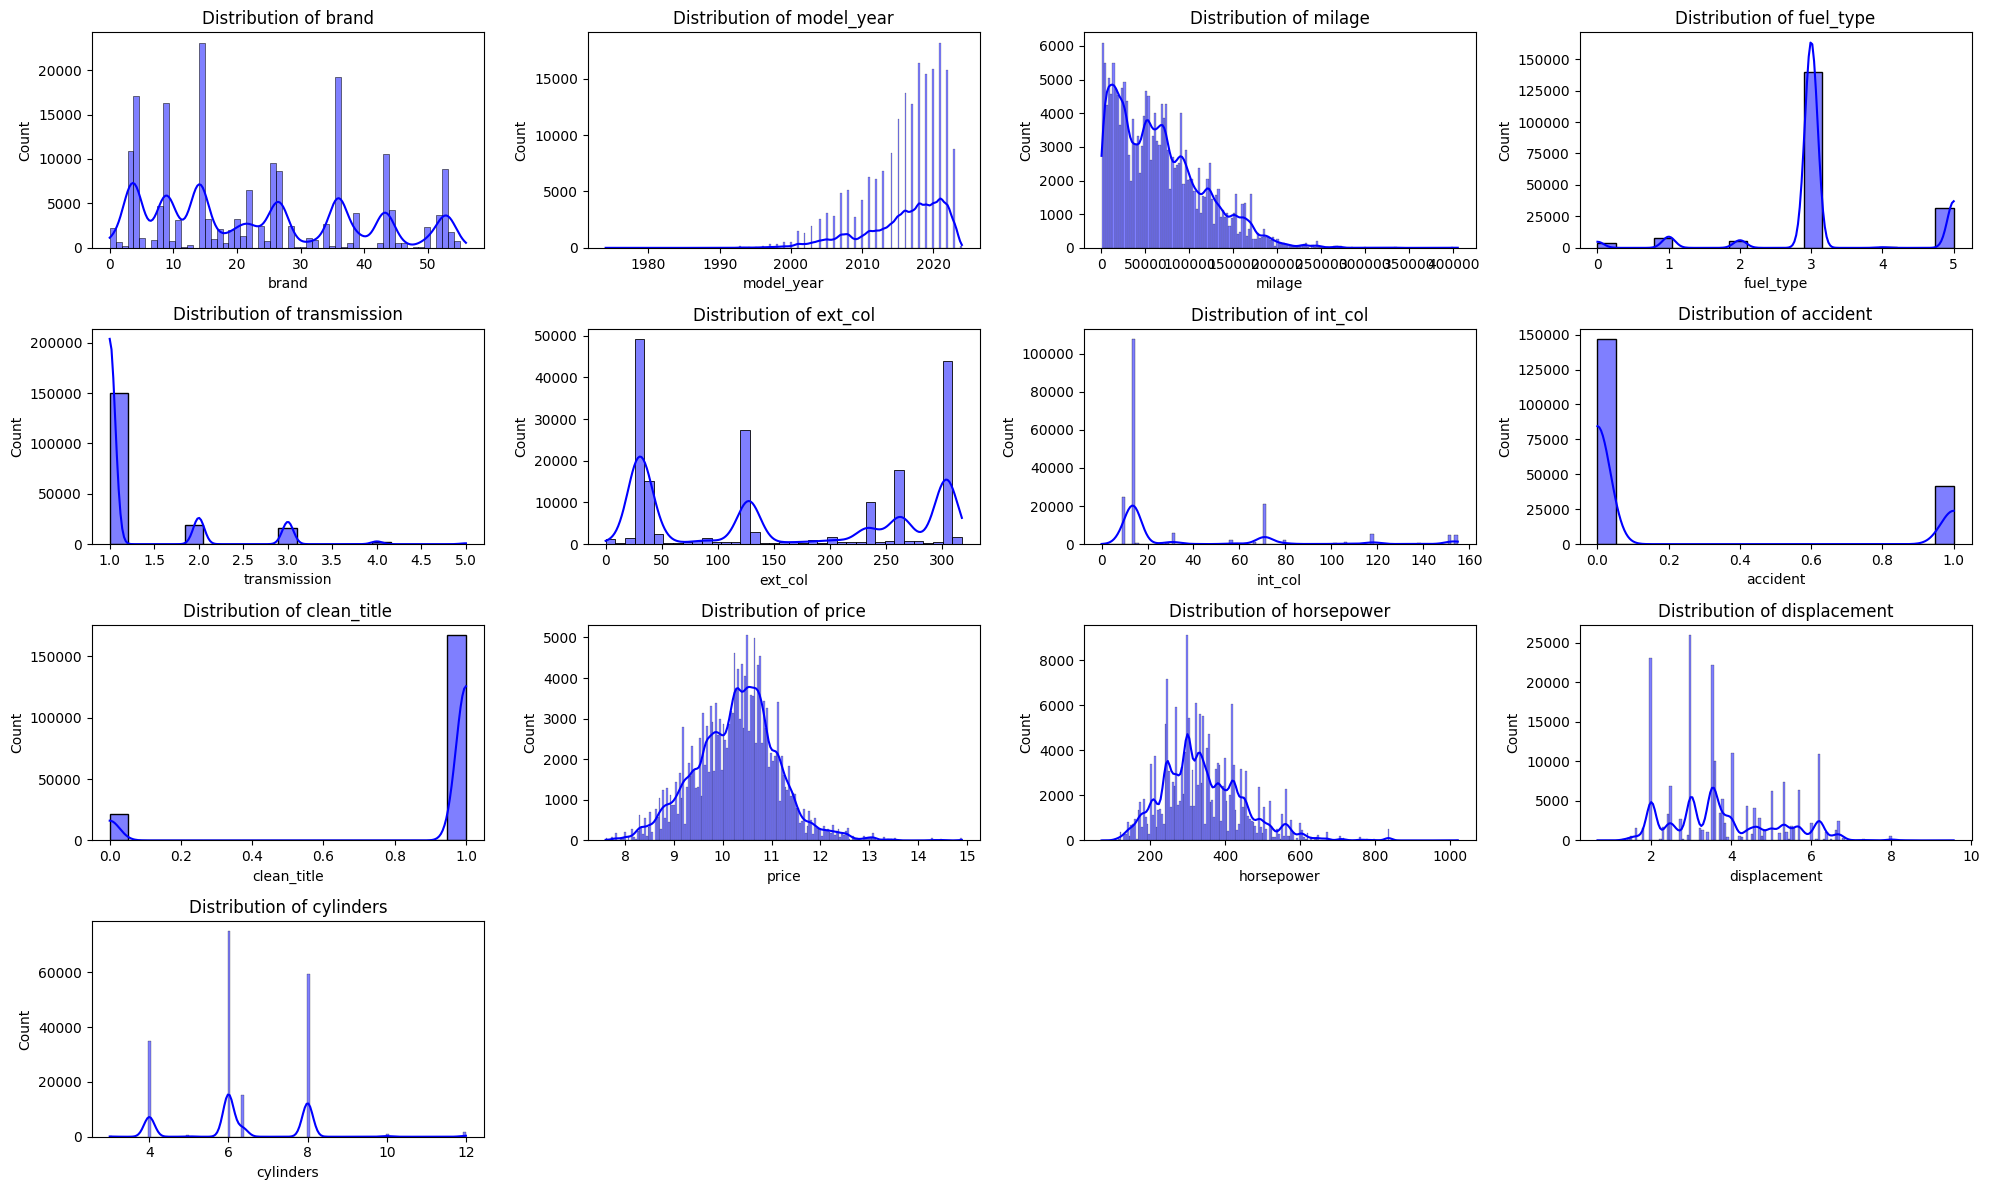

In [277]:
# Set the number of rows and columns for the grid
n_rows = 4
n_cols = 4

# Filter numerical columns only
num_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))

# Flatten axes array to easily iterate over
axes = axes.flatten()

# Plot each numeric column in a subplot
for i, col in enumerate(num_columns):
    sns.histplot(df_train[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)

# If there are more subplots than features, remove the extra subplots
for j in range(len(num_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

In [278]:
X = df_train.drop(['price'],axis=1)
y = df_train['price']
X.shape, y.shape

((188533, 12), (188533,))

In [279]:
# Initialize scaler
scaler = StandardScaler()

# Scale continuous features
continuous_features = ['milage', 'horsepower', 'displacement', 'cylinders', 'model_year']
df_train[continuous_features] = scaler.fit_transform(df_train[continuous_features])

# Scale the same way for the test set
df_test[continuous_features] = scaler.transform(df_test[continuous_features])

In [284]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [285]:
from sklearn.ensemble import RandomForestRegressor
# Define a reduced parameter grid
param_dist_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize the model
random_forest = RandomForestRegressor(random_state=42)

# Random search over the parameter grid with parallel processing
random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist_rf,
    n_iter=10,  # Reduced number of iterations
    scoring='neg_mean_squared_error',
    cv=3,  # Consider reducing cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [286]:
# Fit the model
random_search_rf.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

Best Parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [287]:
# Predict on the test set
y_pred = random_search_rf.predict(X_val)

# Evaluate the model
rmse = np.sqrt(np.mean((np.expm1(y_pred) - np.expm1(y_val))**2))

print(f'Optimized Random Forest RMSE: {rmse:.2f}')

Optimized Random Forest RMSE: 66008.30
